In [2]:
import math
import matplotlib.pyplot as plt
from pylab import *


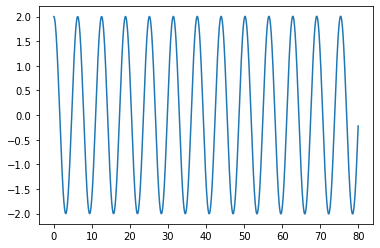

In [3]:
xt = [2]
t = [0]
k = 1

dt = 0.0001
Vx = 0
for i in range(800000):
    t.append(dt*i)
    a = -k*xt[i]
    xt.append(xt[i] + dt*Vx)
    Vx = Vx + dt*a
plt.plot(t,xt)


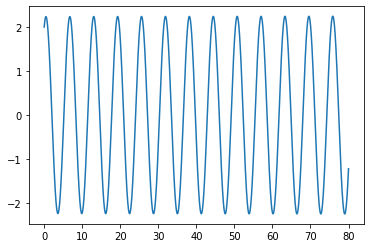

In [6]:
xt = [2]
t = [0]
k = 1

dt = 0.0001
Vx = 0
for i in range(800000):
    t.append(dt*i)
    a = -k*xt[i]
    xt.append(xt[i] + dt*Vx)
    Vx = Vx + dt*a
plt.plot(t,xt)

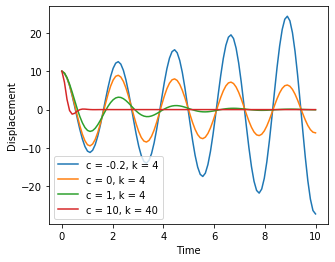

In [18]:
import numpy as np
from scipy.integrate import odeint
from matplotlib import pyplot as plt

mass = 0.5  # kg
kspring = 4  # N/m
cviscous = .1  # N s/m


eps = cviscous / (2 * mass * np.sqrt(kspring/mass))
omega = np.sqrt(kspring / mass)


def calc_deri(yvec, time, eps, omega):
    return (yvec[1], -eps * omega * yvec[1] - omega **2 * yvec[0])

time_vec = np.linspace(0, 10, 100)
yinit = (10, -1)
y_0 = odeint(calc_deri, yinit, time_vec, args=(eps, omega))

#Line with negative damping
mass = 0.5  # kg
kspring = 4  # N/m
cviscous = -.2  # N s/m

eps = cviscous / (2 * mass * np.sqrt(kspring/mass))
omega = np.sqrt(kspring / mass)

y_neg = odeint(calc_deri, yinit, time_vec, args=(eps, omega))

#Line with positive damping
mass = 0.5  # kg
kspring = 4  # N/m
cviscous = 1 # N s/m

eps = cviscous / (2 * mass * np.sqrt(kspring/mass))
omega = np.sqrt(kspring / mass)

y_pos = odeint(calc_deri, yinit, time_vec, args=(eps, omega))


mass = 0.5  # kg
kspring = 40  # N/m
cviscous = 10 # N s/m

eps = cviscous / (2 * mass * np.sqrt(kspring/mass))
omega = np.sqrt(kspring / mass)

y_high = odeint(calc_deri, yinit, time_vec, args=(eps, omega))

plt.figure(figsize=(5, 4))
plt.plot(time_vec, y_neg[:, 0], label='c = -0.2, k = 4')
plt.plot(time_vec, y_0[:, 0], label='c = 0, k = 4')
plt.plot(time_vec, y_pos[:, 0], label='c = 1, k = 4')
plt.plot(time_vec, y_high[:, 0], label='c = 10, k = 40')
# plt.plot(time_vec, yarr[:, 1], label="y'")
plt.legend(loc='best')
plt.xlabel("Time")
plt.ylabel("Displacement")
plt.savefig("Spring_with_damping.pdf")